In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# Read dataset
df = pd.read_csv("Data-GP1-1(updated).csv")
df

,Mon,Tue,Wed,Thu,Date,Jan,Feb,Mar,Apr,May,Month,Year,Stormy,Mixed,p,q,Rainy,Cold,Wind
0,1,0,0,0,2,0,0,0,0,0,12,91,1,0,-0.430783,8.994421,1,0,2.995732
1,0,1,0,0,3,0,0,0,0,0,12,91,1,0,0.000000,7.707063,0,0,2.995732
2,0,0,1,0,4,0,0,0,0,0,12,91,0,1,0.072321,8.350194,1,1,2.813411
3,0,0,0,1,5,0,0,0,0,0,12,91,1,0,0.247139,8.656955,0,1,3.036554
4,0,0,0,0,6,0,0,0,0,0,12,91,1,0,0.664327,7.844241,0,1,3.036554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,0,0,0,4,0,0,0,0,1,5,92,0,0,-0.798508,8.610683,0,0,2.862201
107,0,1,0,0,5,0,0,0,0,1,5,92,0,1,-0.087011,7.162397,0,0,2.908721
108,0,0,1,0,6,0,0,0,0,1,5,92,0,1,0.184922,7.362010,0,0,2.862201
109,0,0,0,1,7,0,0,0,0,1,5,92,0,1,0.223143,8.764053,0,0,2.813411


In [71]:
df.describe()

,Mon,Tue,Wed,Thu,Date,Jan,Feb,Mar,Apr,May,Month,Year,Stormy,Mixed,p,q,Rainy,Cold,Wind
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,0.189189,0.207207,0.189189,0.207207,15.324324,0.198198,0.171171,0.198198,0.189189,0.054054,4.432432,91.810811,0.288288,0.306306,-0.193681,8.523430,0.162162,0.504505,2.862695
std,0.393435,0.407143,0.393435,0.407143,8.958655,0.400450,0.378367,0.400450,0.393435,0.227150,3.843818,0.393435,0.455020,0.463049,0.381935,0.741672,0.370271,0.502247,0.208632
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,91.000000,0.000000,0.000000,-1.107745,6.194406,0.000000,0.000000,2.456736
25%,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,92.000000,0.000000,0.000000,-0.479651,8.147429,0.000000,0.000000,2.708050
50%,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,92.000000,0.000000,0.000000,-0.206514,8.621193,0.000000,1.000000,2.862201
75%,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,92.000000,1.000000,1.000000,0.163000,9.035391,0.000000,1.000000,2.995732
max,1.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,92.000000,1.000000,1.000000,0.664327,9.981374,1.000000,1.000000,3.401197


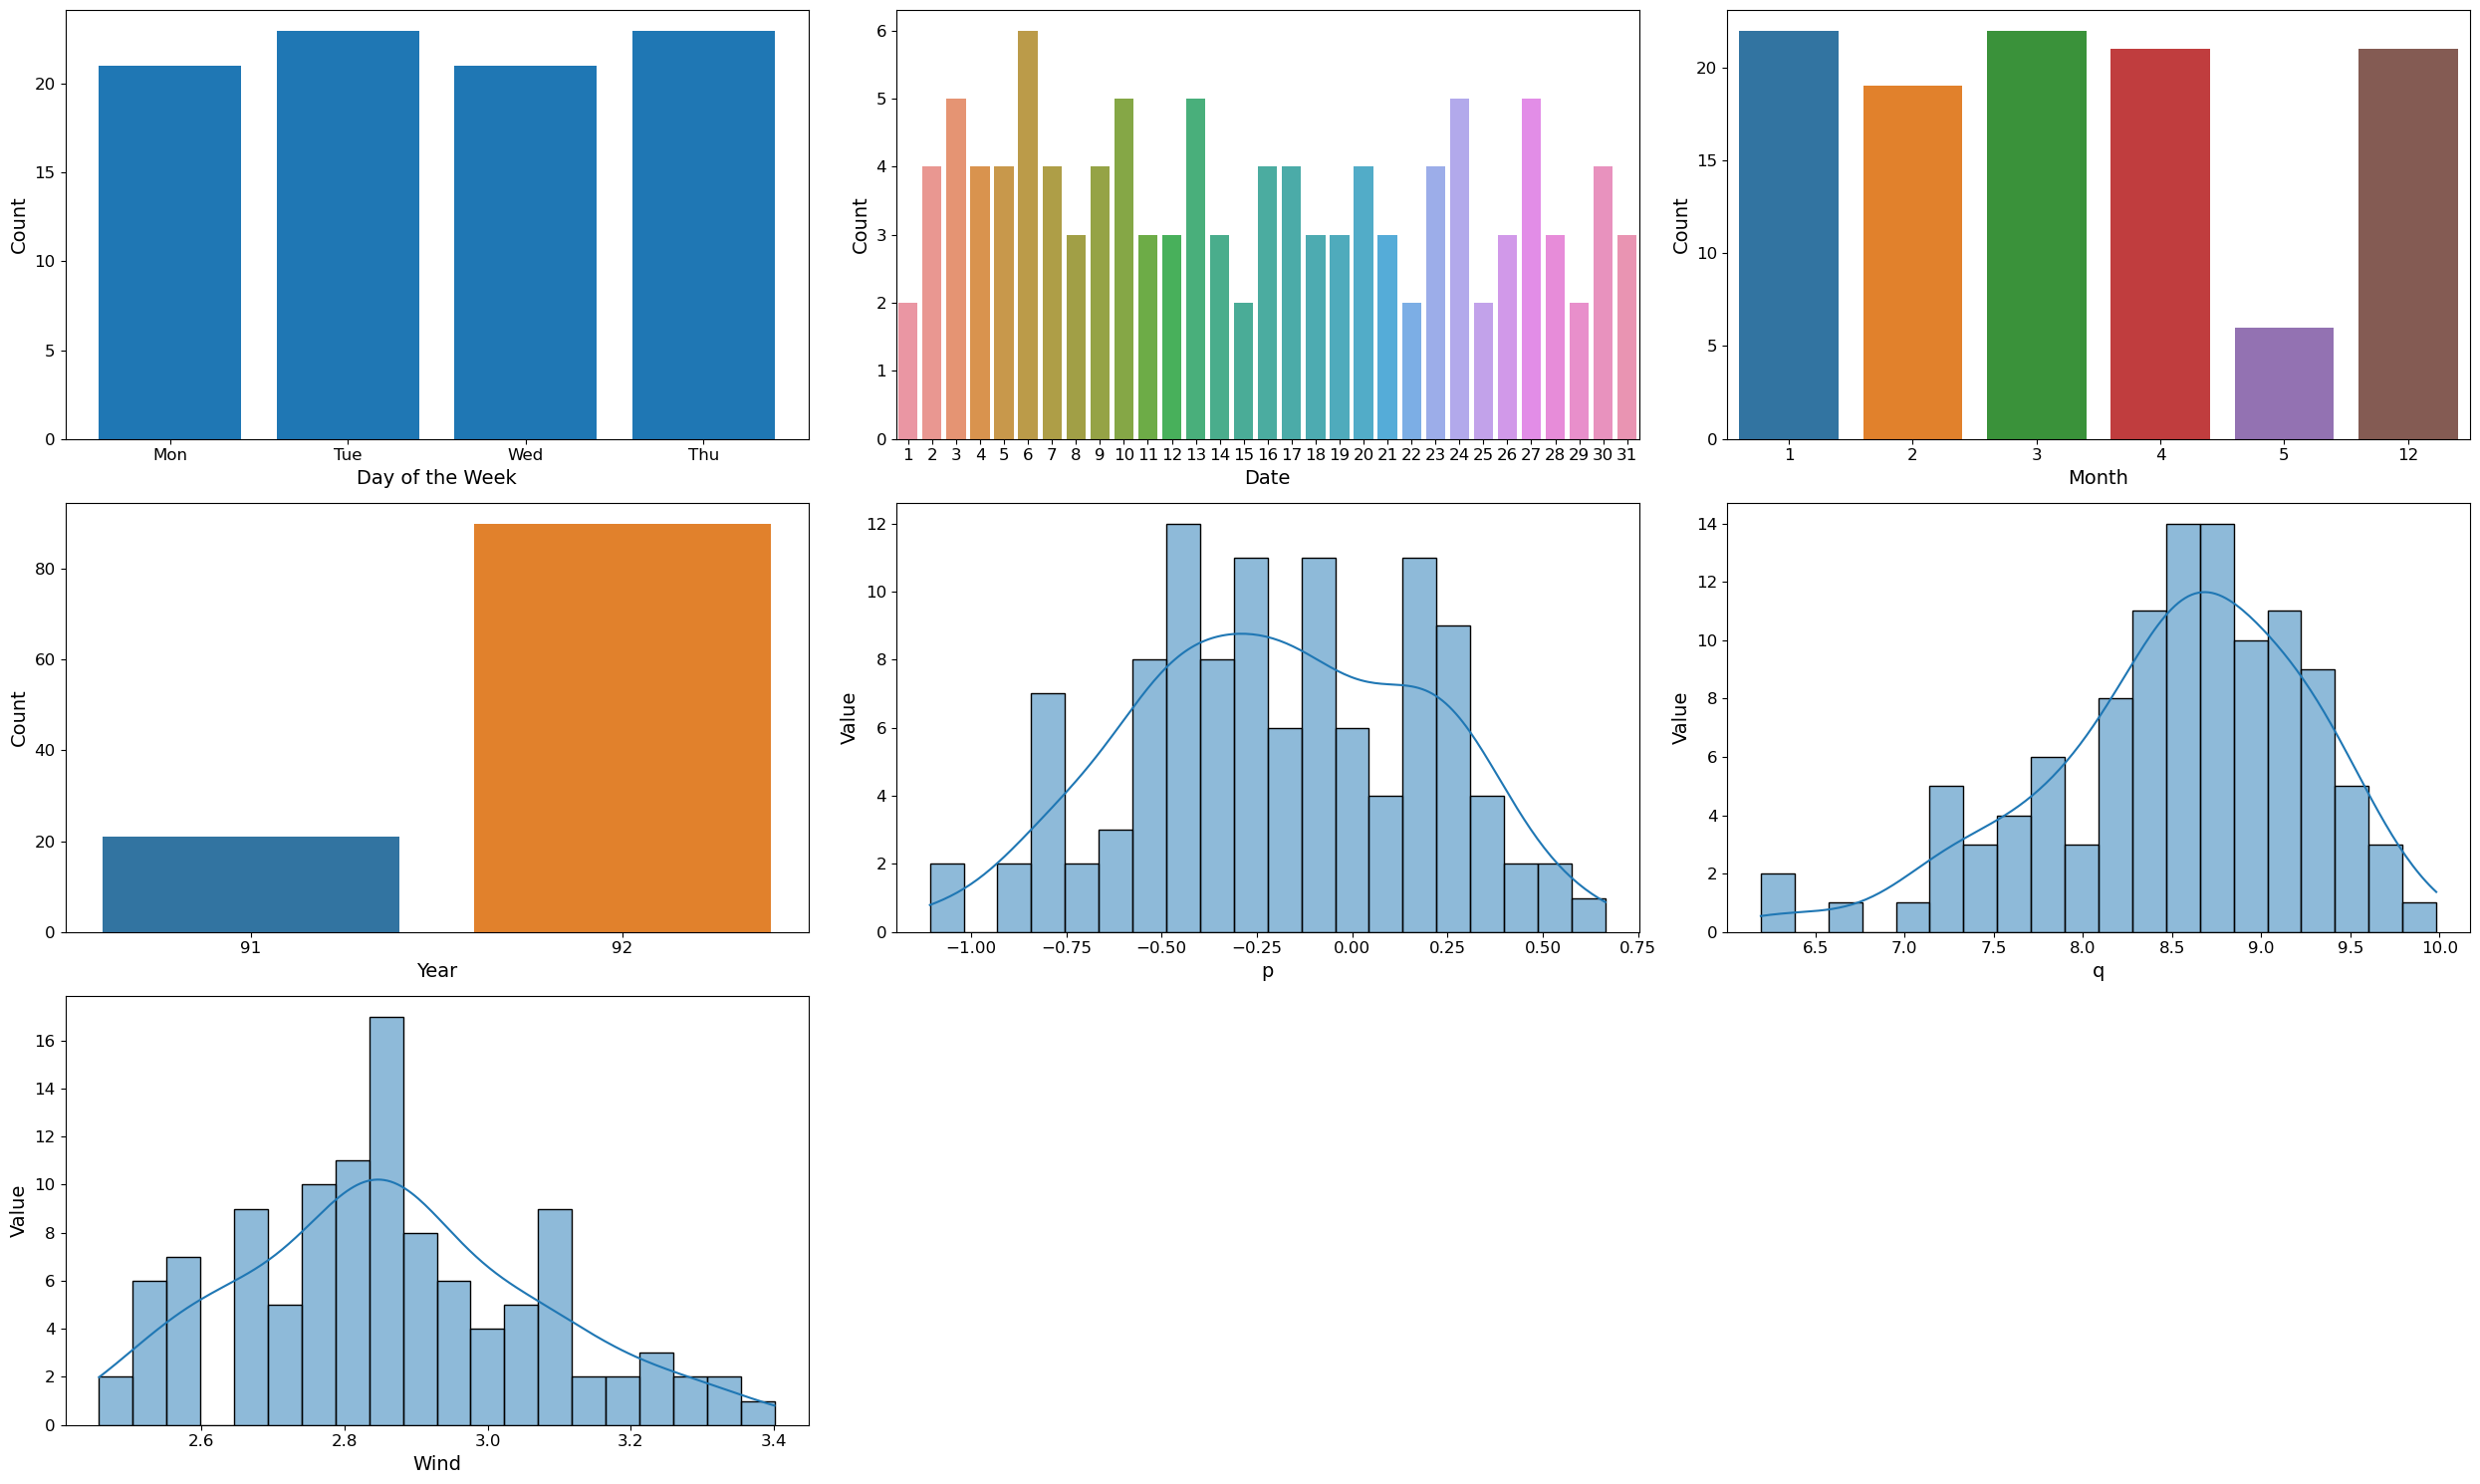

In [72]:
# Define the columns of interest for visualization
columns_to_visualize = [
    (["Mon", "Tue", "Wed", "Thu"], 'Day of the Week'),
    ('Date', 'Date'),
    ('Month', 'Month'),
    ('Year', 'Year'),
    ('p', 'p'),
    ('q', 'q'),
    ('Wind', 'Wind')
]

# Create Figure with subplots
fig, axs = plt.subplots(3, 3, figsize=(25, 15))

for (column, xlabel), ax in zip(columns_to_visualize, axs.flat):
    
    # Create plots for Day of Week
    if isinstance(column, list):
        data = df[column].sum()
        ax.bar(data.index, data.values)
        ylabel = "Count"
        
    
    # Create plots for Date, Month and Year
    elif column != "p" and column != "q" and column != "Wind":
        sns.countplot(data=df, x=column, ax=ax)
        ylabel = "Count"
    
    # Create plots for p, q and Wind
    else:
        sns.histplot(df[column], bins=20, kde=True, ax=ax)
        ylabel = "Value"
    
    # Set axis labels
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14) 
    
    # Set font size for tick labels
    ax.tick_params(axis='both', labelsize=12)

# Remove empty subplots [2,1] and [2,2]
fig.delaxes(axs[2, 1])
fig.delaxes(axs[2, 2])

# Adjust layout
plt.tight_layout()

# Show the combined figure
plt.show()

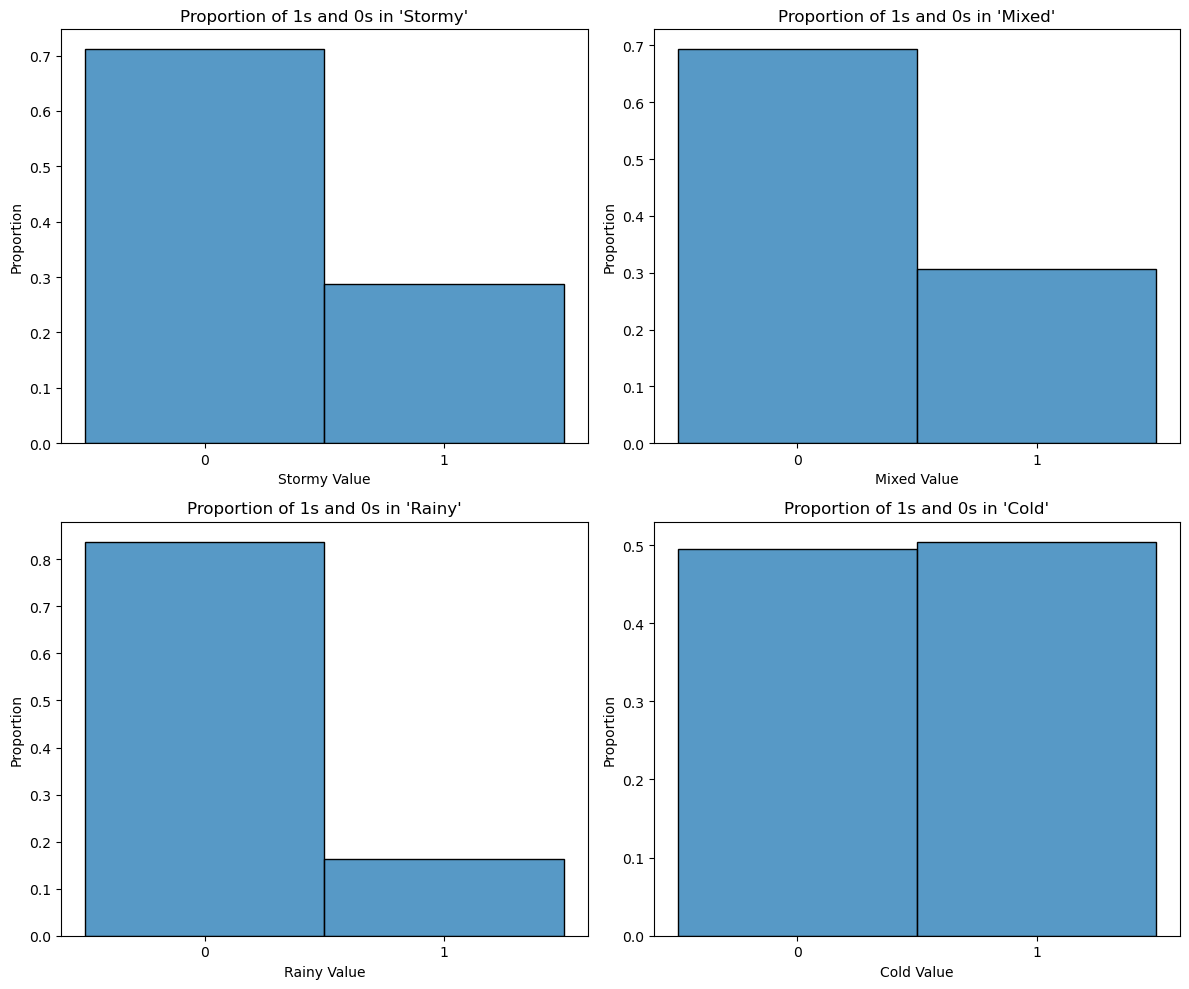

In [75]:
# Create Figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Calculate and plot the proportion of 1s and 0s for each variable
variables = ["Stormy", "Mixed", "Rainy", "Cold"]

for i, variable in enumerate(variables):
    
    # Calculate the proportion of 1s and 0s
    proportion = df[variable].value_counts(normalize=True)
    
    # Plot the histogram in the corresponding subplot
    sns.histplot(data=proportion.reset_index(), x="index", weights=variable, stat="probability", discrete=True, ax=axs[i // 2, i % 2])
    
    axs[i // 2, i % 2].set_xlabel(f"{variable} Value")
    axs[i // 2, i % 2].set_ylabel("Proportion")
    axs[i // 2, i % 2].set_title(f"Proportion of 1s and 0s in '{variable}'")
    axs[i // 2, i % 2].set_xticks([0, 1])
    axs[i // 2, i % 2].set_xticklabels(["0", "1"])

# Adjust layout
plt.tight_layout()

# Show the combined figure
plt.show()

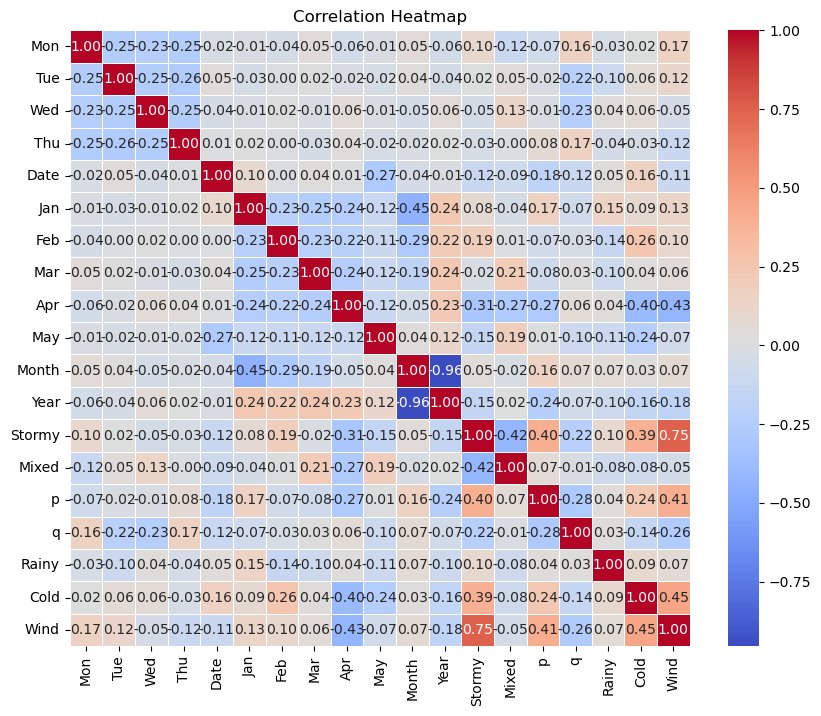

In [76]:
correlation_matrix = df.corr()

# Create Figure
plt.figure(figsize=(10, 8))

# Create heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()